In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Budget-Analysis.csv")
data=df.head()
print(data)
col=df.columns
print(col)
df.columns = df.columns.str.strip()

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [ ]:
# Function to convert values in parentheses to negative numbers
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [ ]:
# List of columns to clean
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


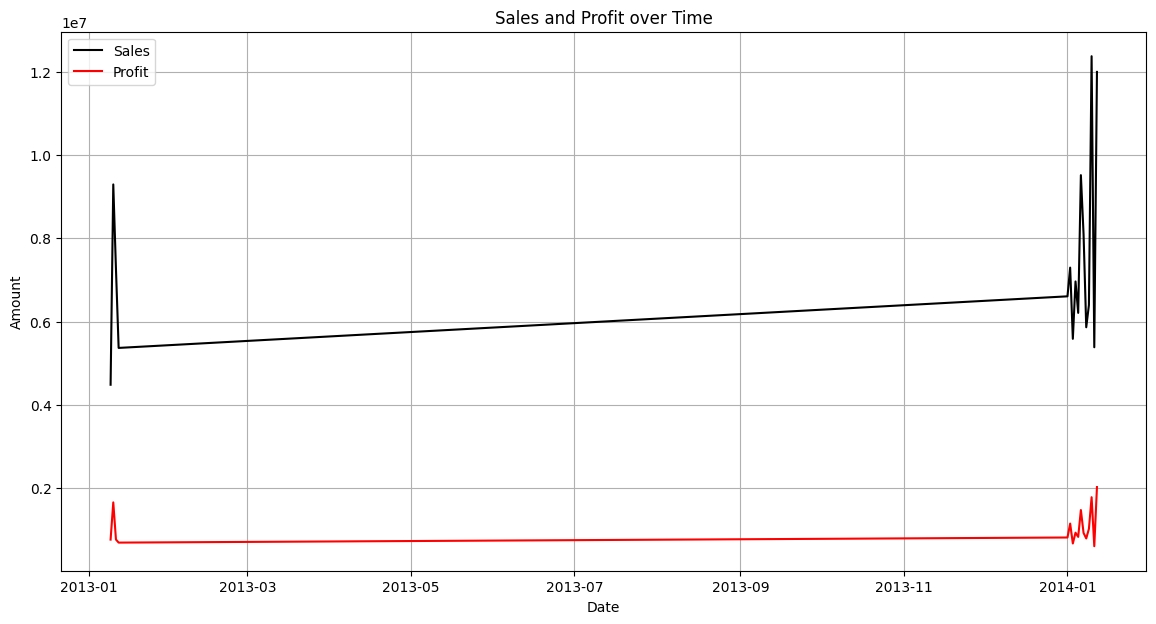

In [ ]:
# Group data by Date
grouped_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales',color='black')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit',color="red")
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

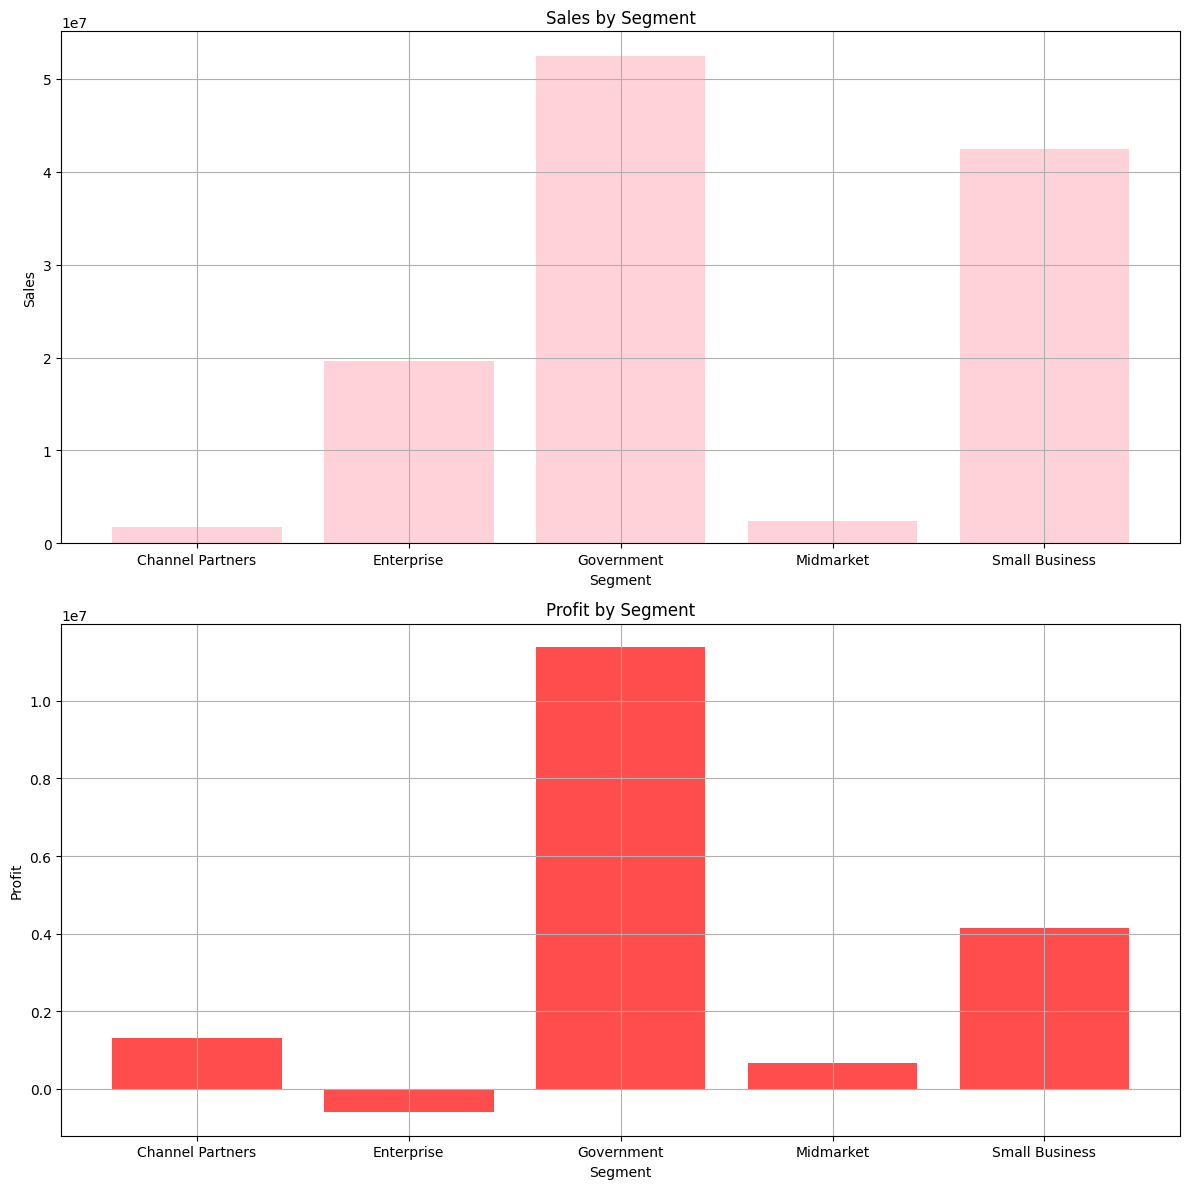

In [ ]:
# Group data by Segment
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color='pink', alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color='red', alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

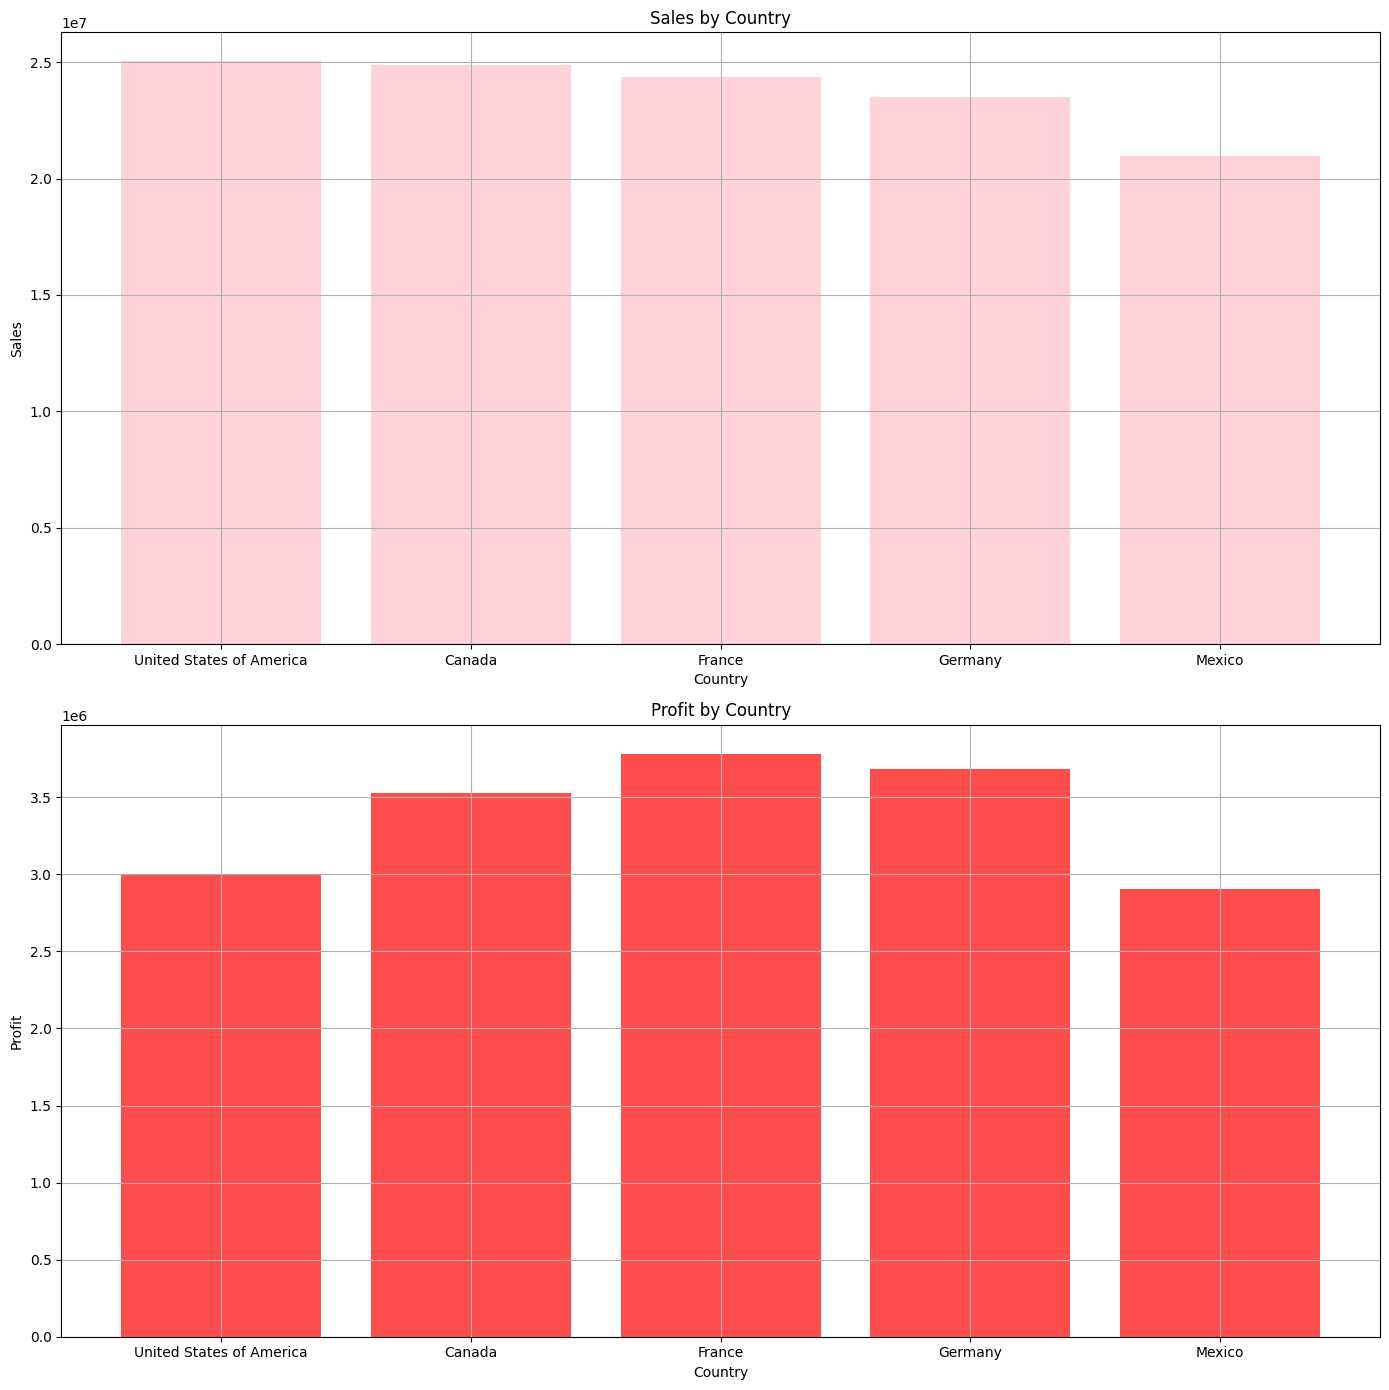

In [ ]:
# Group data by Country
grouped_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_country.index, grouped_country['Sales'], color='pink', alpha=0.7)
ax[0].set_title('Sales by Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x')
ax[0].grid()

ax[1].bar(grouped_country.index, grouped_country['Profit'], color='red', alpha=0.7)
ax[1].set_title('Profit by Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x')
ax[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
df['Discounts'].describe()

,Discounts
count,647.000000
mean,14227.586198
std,23562.833079
min,18.410000
25%,1061.000000
50%,3108.000000
75%,18809.250000
max,149677.500000


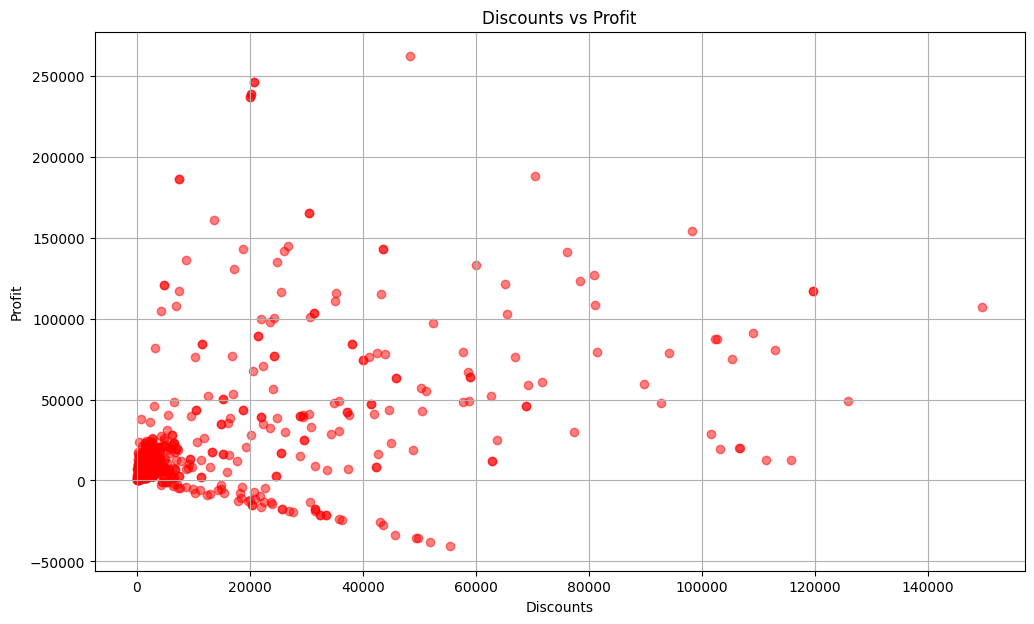

In [ ]:
# Create a scatter plot of 'Discounts' vs 'Profit'
plt.figure(figsize=(12, 7))
plt.scatter(df['Discounts'], df['Profit'], alpha=0.5,color="red")
plt.title('Discounts vs Profit')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.grid()
plt.show()

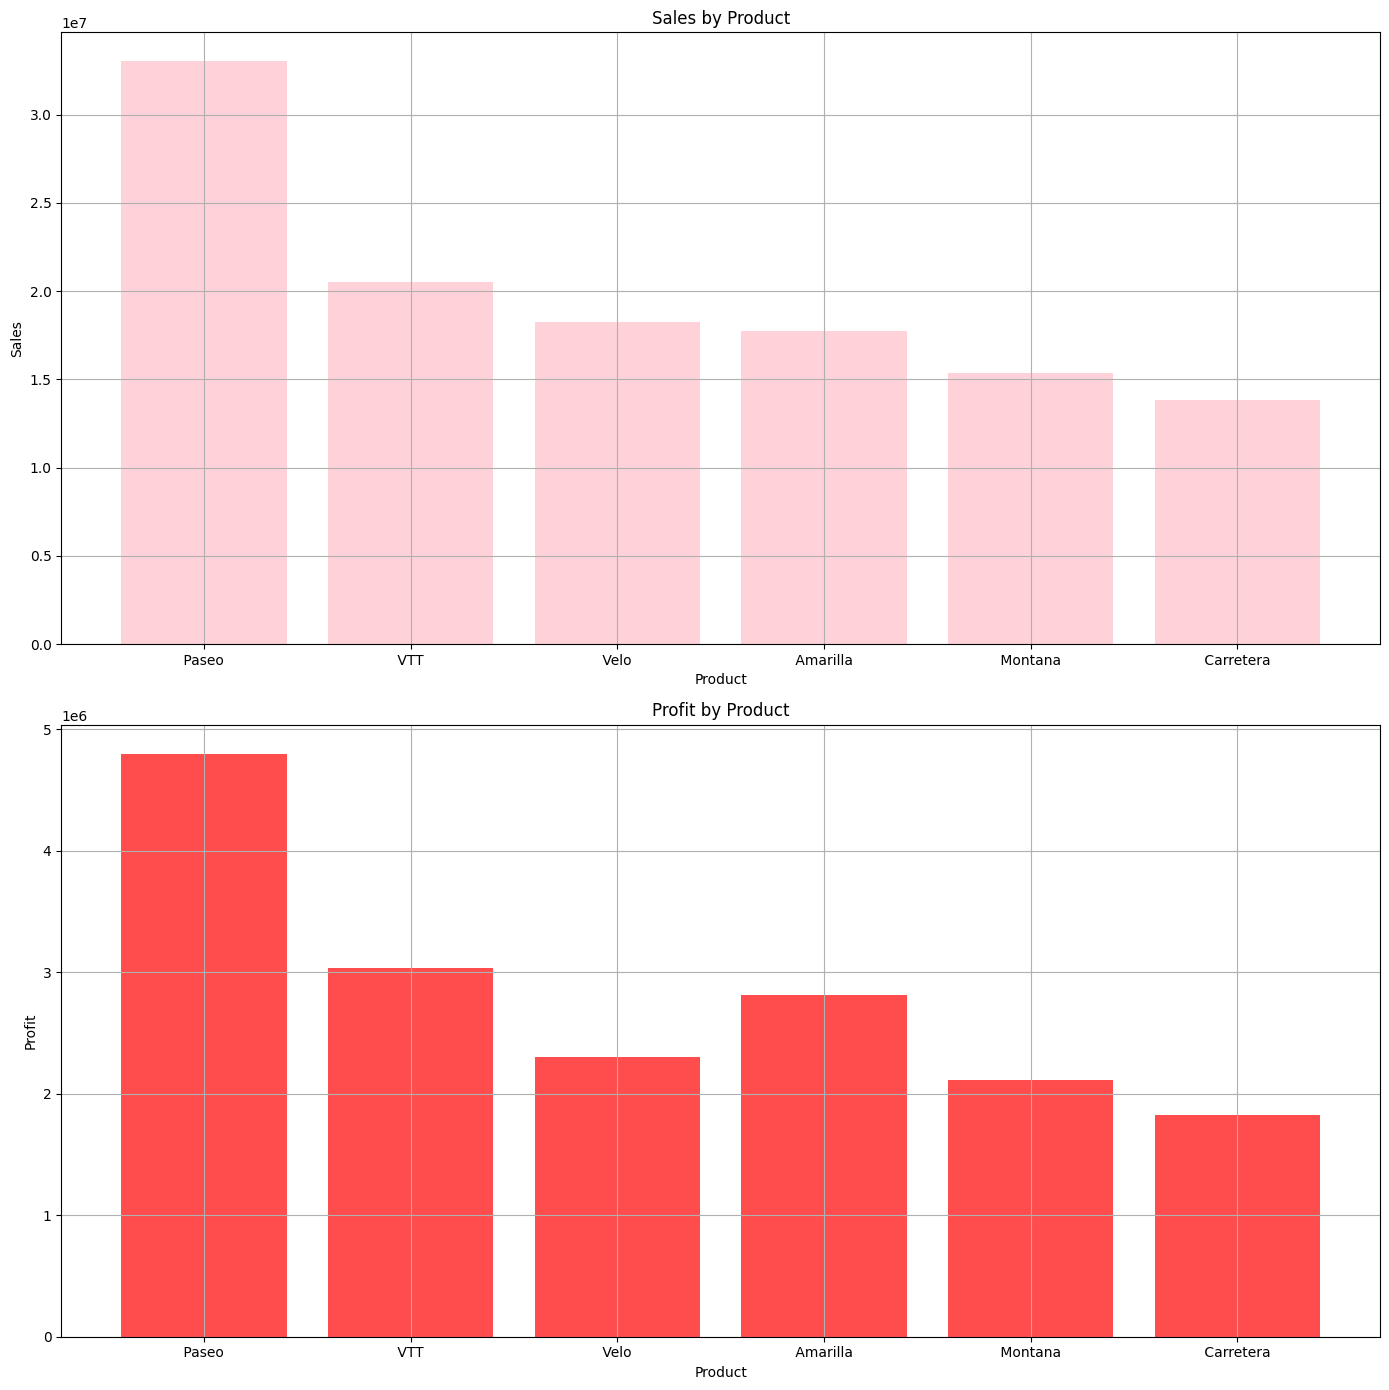

In [ ]:
 #Group data by Product
grouped_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_product = grouped_product.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Product
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_product.index, grouped_product['Sales'], color='pink', alpha=0.7)
ax[0].set_title('Sales by Product')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x')
ax[0].grid()

ax[1].bar(grouped_product.index, grouped_product['Profit'], color='red', alpha=0.7)
ax[1].set_title('Profit by Product')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x')
ax[1].grid()

plt.tight_layout()
plt.show()

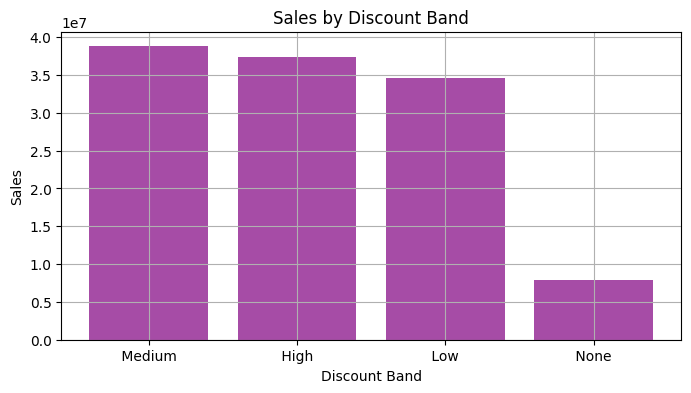

In [ ]:
# Group data by Discount Band
grouped_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
grouped_discount = grouped_discount.sort_values(by='Sales', ascending=False)

# Plot Sales by Discount Band
plt.figure(figsize=(8, 4))
plt.bar(grouped_discount.index, grouped_discount['Sales'], color='purple', alpha=0.7)
plt.title('Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Sales')
plt.grid()
plt.show()

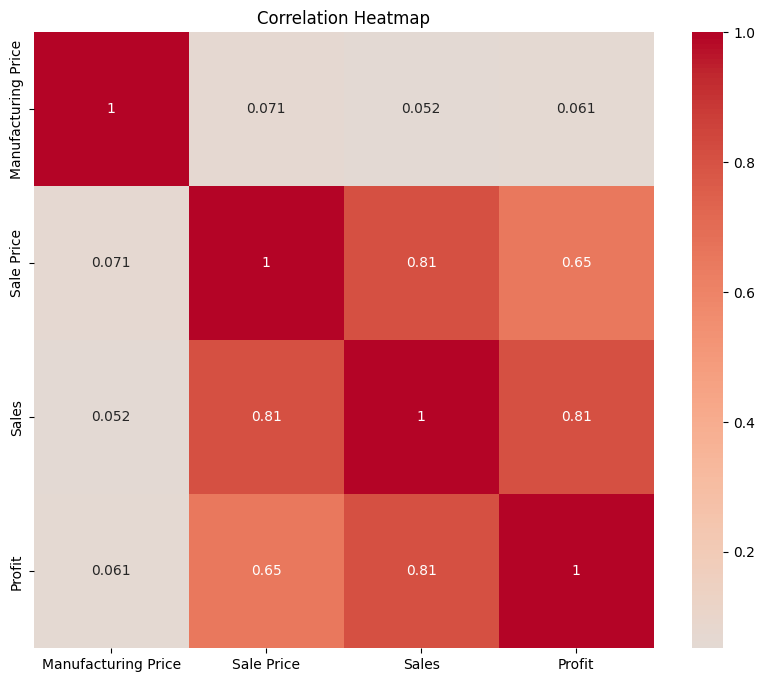

In [ ]:
import seaborn as sns

# Calculate correlation
correlation = df[['Manufacturing Price', 'Sale Price', 'Sales', 'Profit']].corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

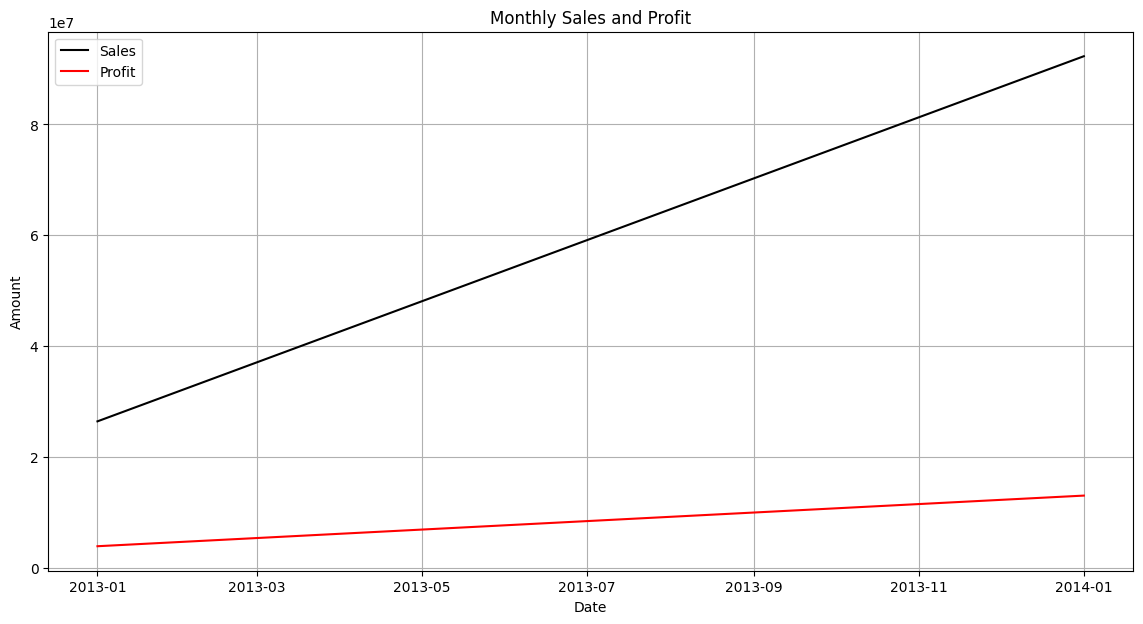

In [ ]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], label='Sales',color="black")
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], label='Profit',color="red")
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

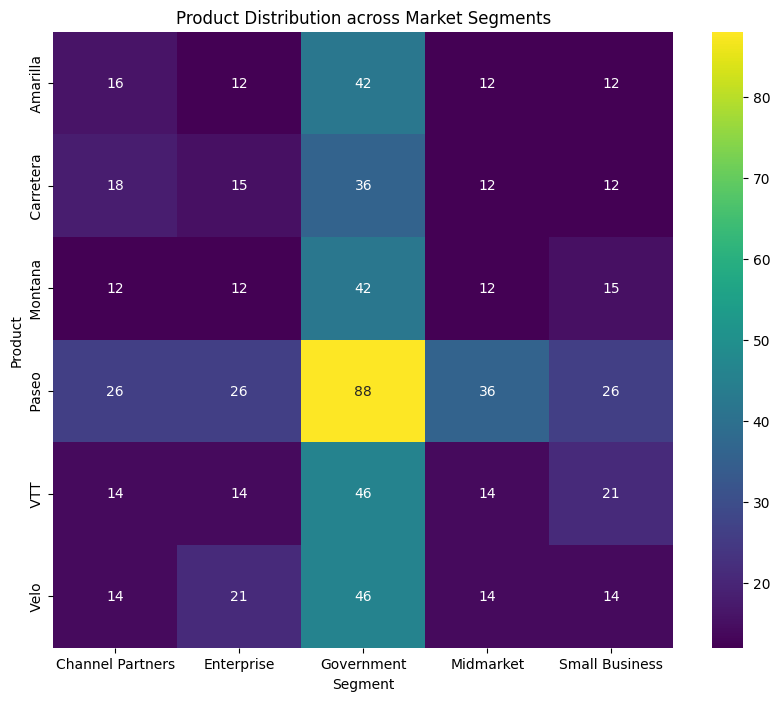

In [ ]:
# Create a cross-tabulation of 'Product' and 'Segment'
product_segment_crosstab = pd.crosstab(df['Product'], df['Segment'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Product Distribution across Market Segments')
plt.show()


<ipython-input-31-3d57158b173f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)


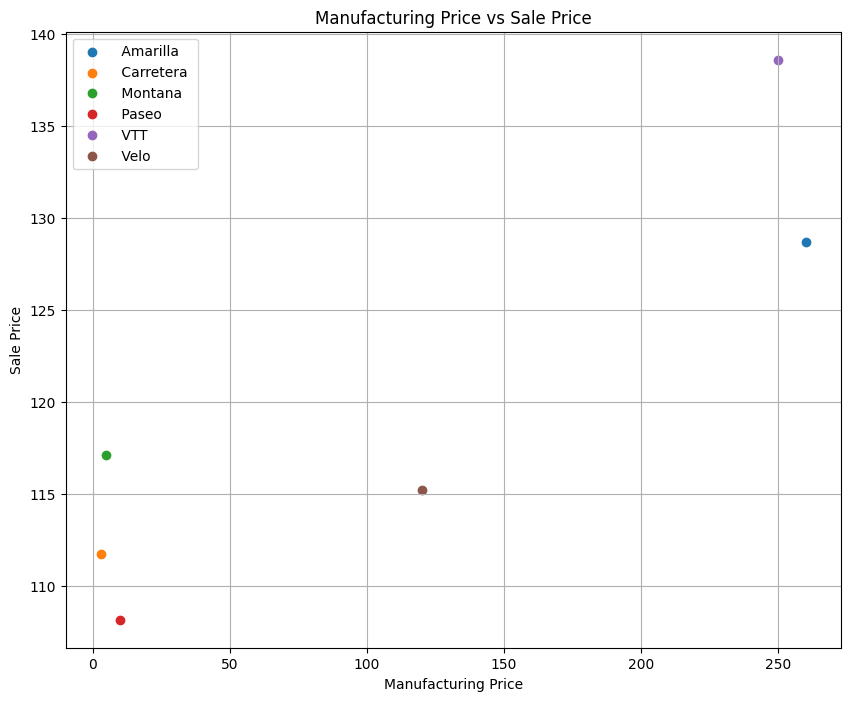

In [ ]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each product
average_prices = df.groupby('Product').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Create a scatter plot of 'Manufacturing Price' vs 'Sale Price'
plt.figure(figsize=(10, 8))
for i, product in enumerate(average_prices.index):
    plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)
plt.title('Manufacturing Price vs Sale Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid()
plt.show()

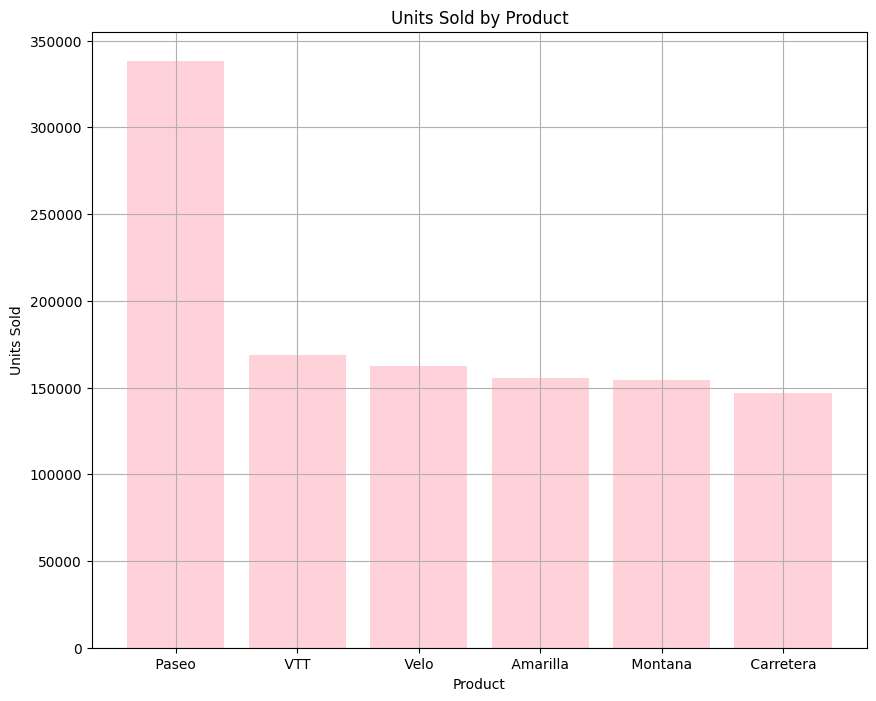

In [ ]:
# Calculate total 'Units Sold' for each product
product_units_sold = df.groupby('Product').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
product_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Product
plt.figure(figsize=(10, 8))
plt.bar(product_units_sold.index, product_units_sold['Units Sold'], color='pink', alpha=0.7)
plt.title('Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks()
plt.grid()
plt.show()

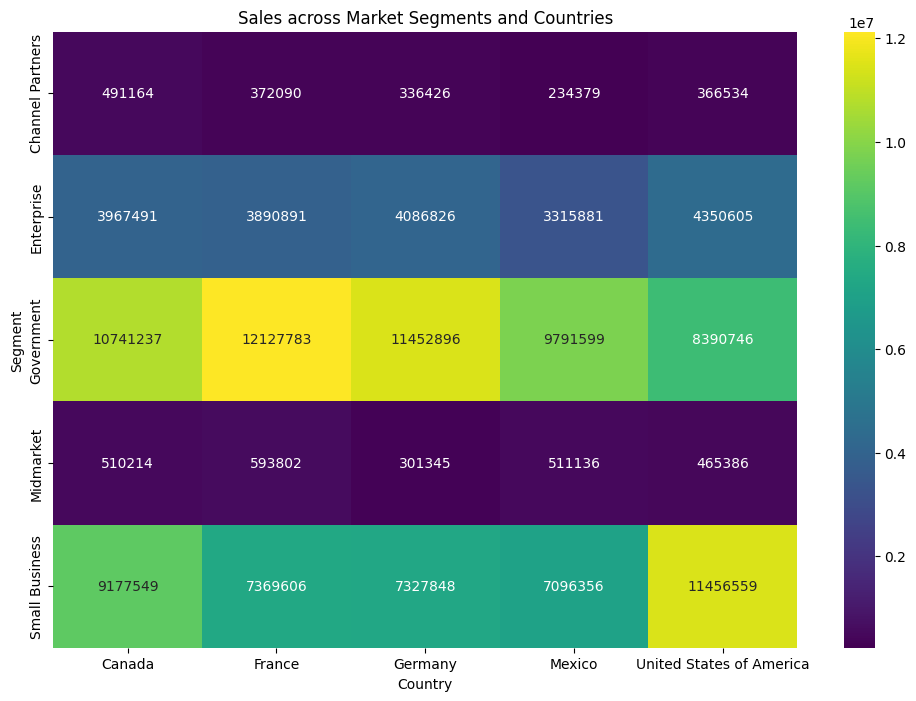

In [ ]:
# Create a cross-tabulation of 'Segment' and 'Country' with 'Sales' as values
segment_country_sales = df.pivot_table(values='Sales', index='Segment', columns='Country', aggfunc='sum')

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(segment_country_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales across Market Segments and Countries')
plt.show()

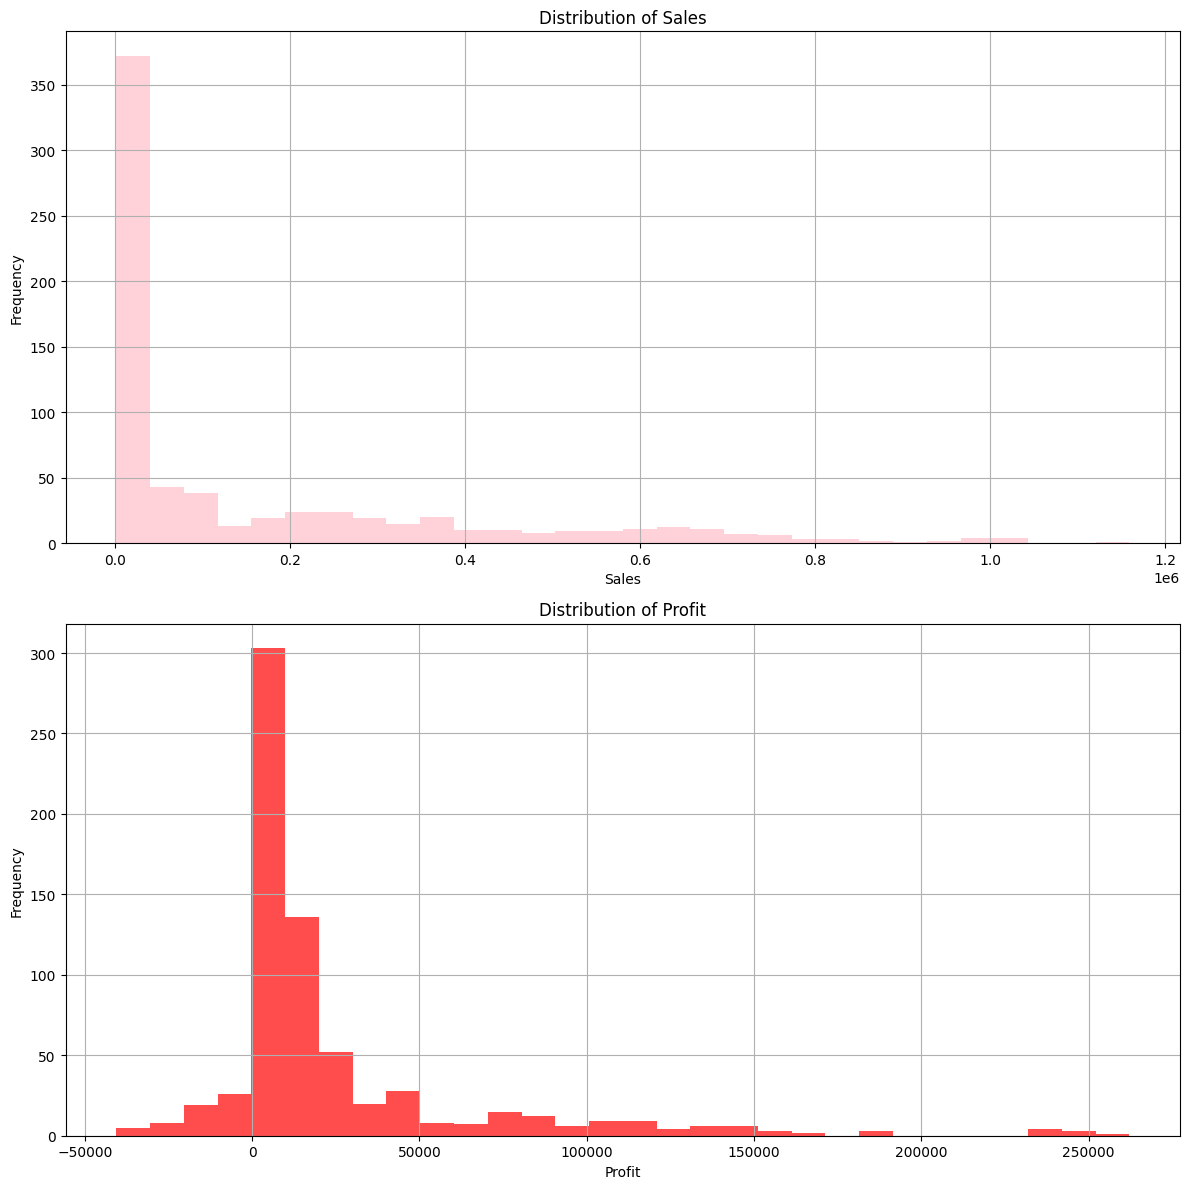

In [ ]:
# Create histograms for 'Sales' and 'Profit'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].hist(df['Sales'], bins=30, color='pink', alpha=0.7)
ax[0].set_title('Distribution of Sales')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1].hist(df['Profit'], bins=30, color='red', alpha=0.7)
ax[1].set_title('Distribution of Profit')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('Frequency')
ax[1].grid()

plt.tight_layout()
plt.show()

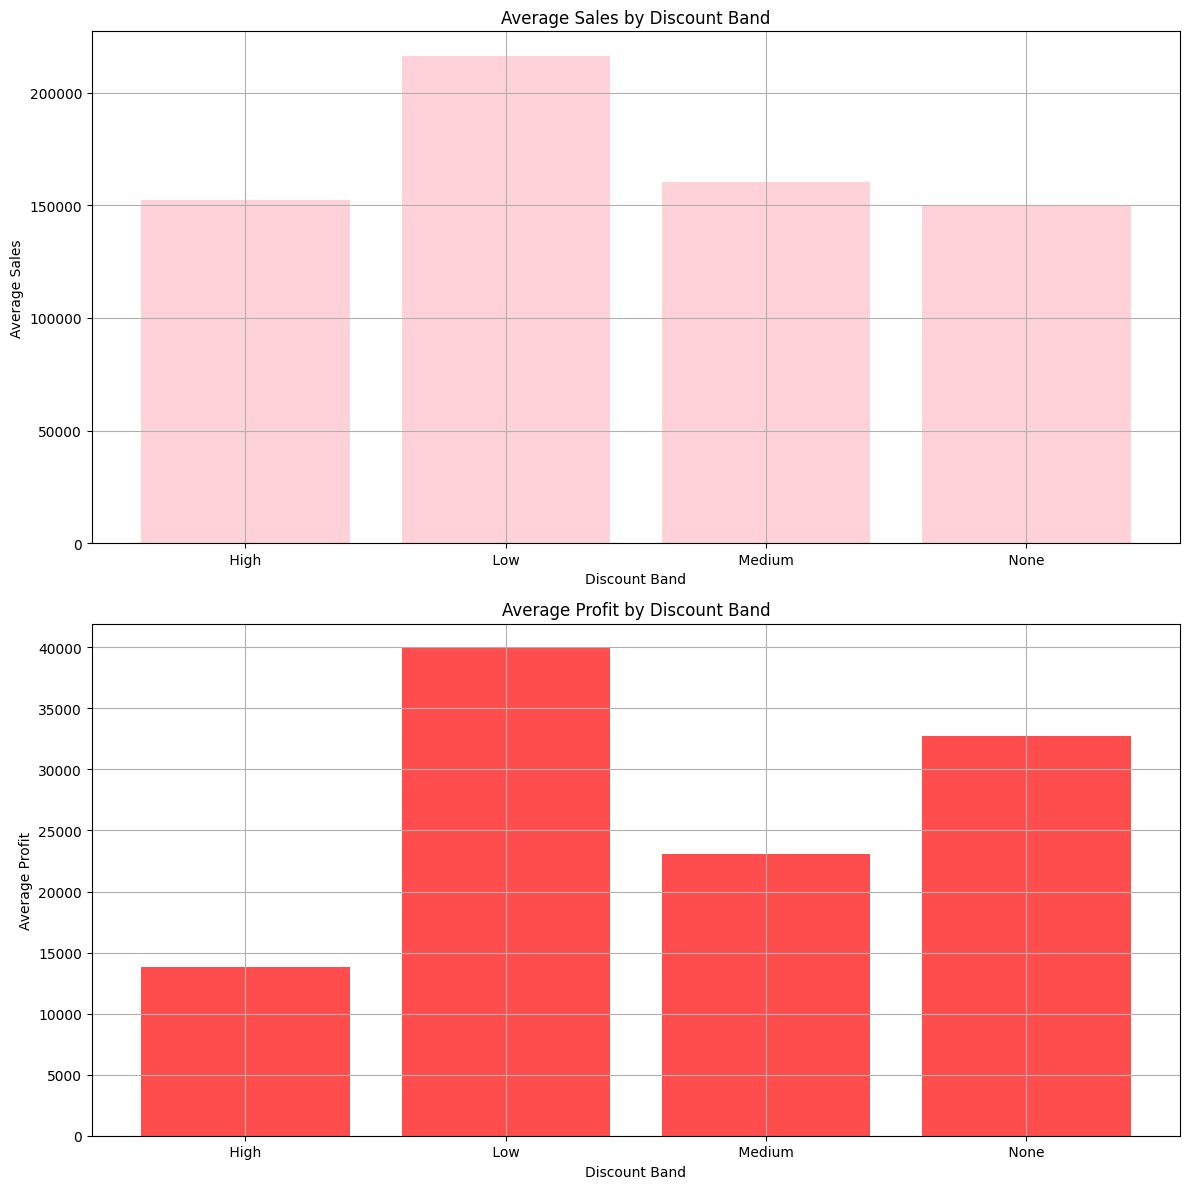

In [ ]:
# Calculate average 'Sales' and 'Profit' for each 'Discount Band'
discount_band_averages = df.groupby('Discount Band').agg({'Sales': 'mean', 'Profit': 'mean'})

# Plot average 'Sales' and 'Profit' by 'Discount Band'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(discount_band_averages.index, discount_band_averages['Sales'], color='pink', alpha=0.7)
ax[0].set_title('Average Sales by Discount Band')
ax[0].set_xlabel('Discount Band')
ax[0].set_ylabel('Average Sales')
ax[0].grid()

ax[1].bar(discount_band_averages.index, discount_band_averages['Profit'], color='red', alpha=0.7)
ax[1].set_title('Average Profit by Discount Band')
ax[1].set_xlabel('Discount Band')
ax[1].set_ylabel('Average Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

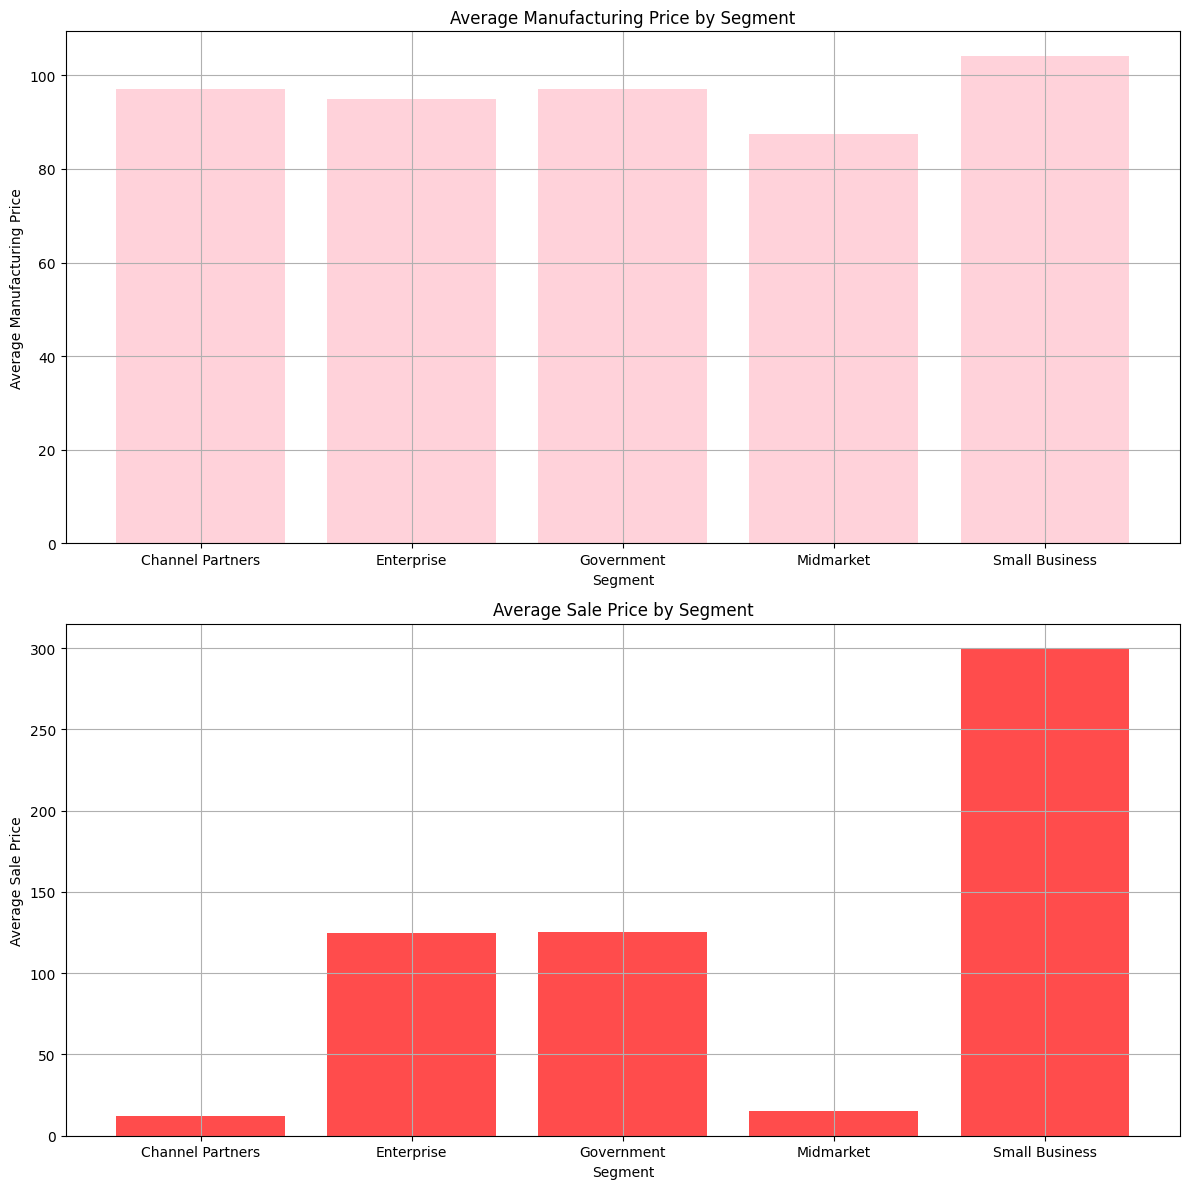

In [ ]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each 'Segment'
segment_prices = df.groupby('Segment').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Plot average 'Manufacturing Price' and 'Sale Price' by 'Segment'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(segment_prices.index, segment_prices['Manufacturing Price'], color='pink', alpha=0.7)
ax[0].set_title('Average Manufacturing Price by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Average Manufacturing Price')
ax[0].grid()

ax[1].bar(segment_prices.index, segment_prices['Sale Price'], color='red', alpha=0.7)
ax[1].set_title('Average Sale Price by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Average Sale Price')
ax[1].grid()

plt.tight_layout()
plt.show()


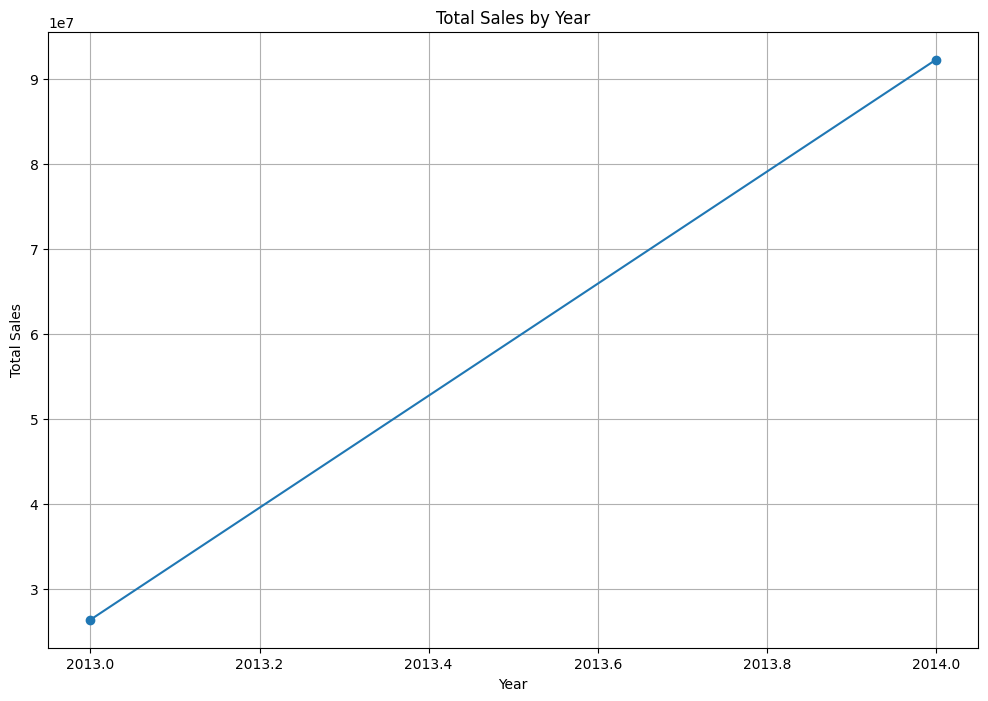

In [ ]:
# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Plot total 'Sales' by year
plt.figure(figsize=(12, 8))
plt.plot(yearly_sales.index, yearly_sales['Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


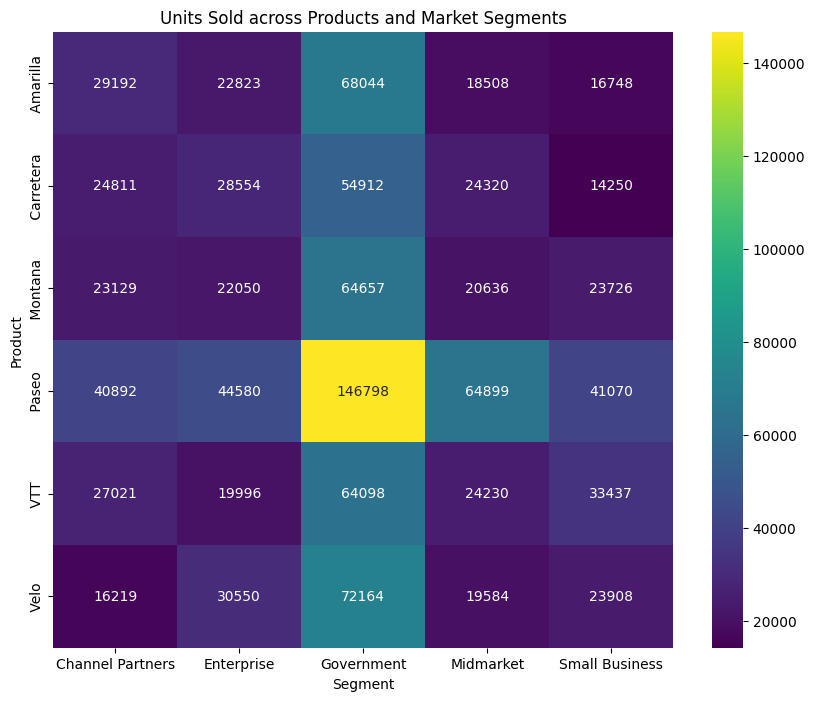

In [ ]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Segment' as dimensions
product_segment_units = df.pivot_table(values='Units Sold', index='Product', columns='Segment', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Market Segments')
plt.show()

In [ ]:
# Calculate total 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='pink', alpha=0.7)
plt.title('Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.xticks()
plt.grid()
plt.show()

NameError: name 'df' is not defined

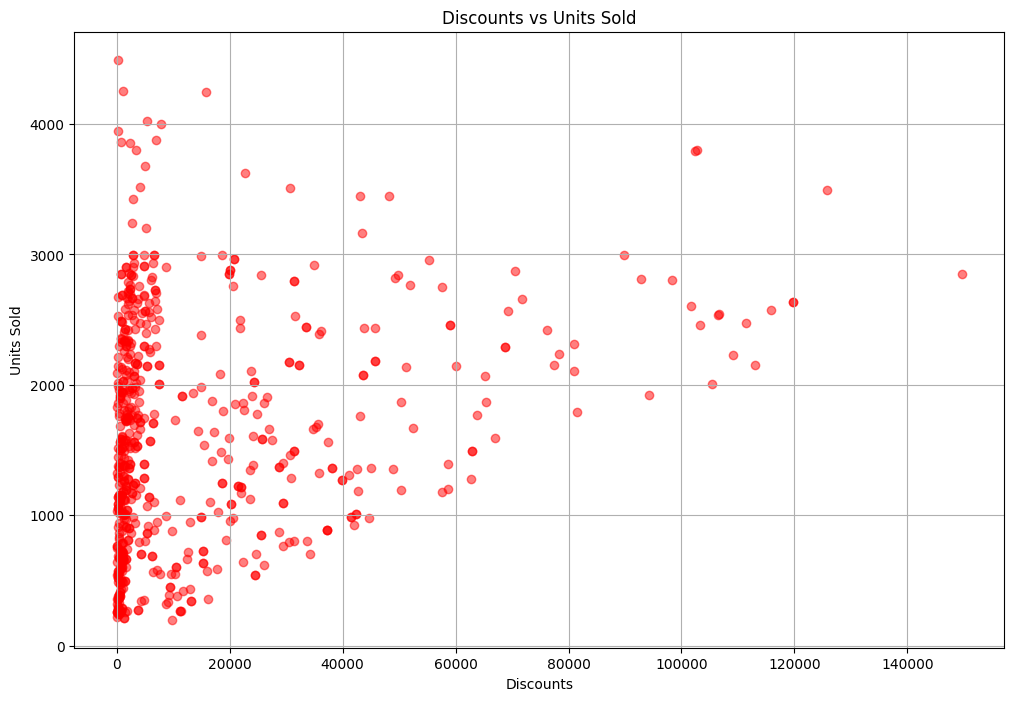

In [ ]:
# Create a scatter plot of 'Discounts' vs 'Units Sold'
plt.figure(figsize=(12, 8))
plt.scatter(df['Discounts'], df['Units Sold'], alpha=0.5,color="red")
plt.title('Discounts vs Units Sold')
plt.xlabel('Discounts')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

<ipython-input-46-6a716bb84cb8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_profit_margin = df.groupby('Product').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)


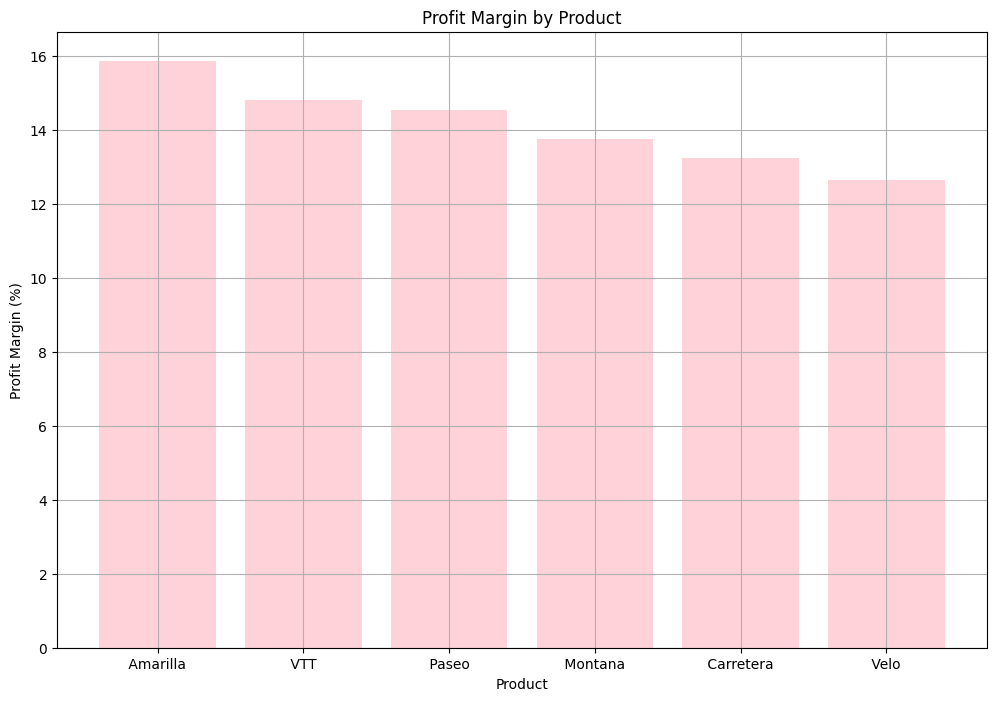

In [ ]:
# Calculate profit margin for each product
product_profit_margin = df.groupby('Product').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)

# Plot profit margin by product
plt.figure(figsize=(12, 8))
plt.bar(product_profit_margin.index, product_profit_margin, color='pink', alpha=0.7)
plt.title('Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks()
plt.grid()
plt.show()


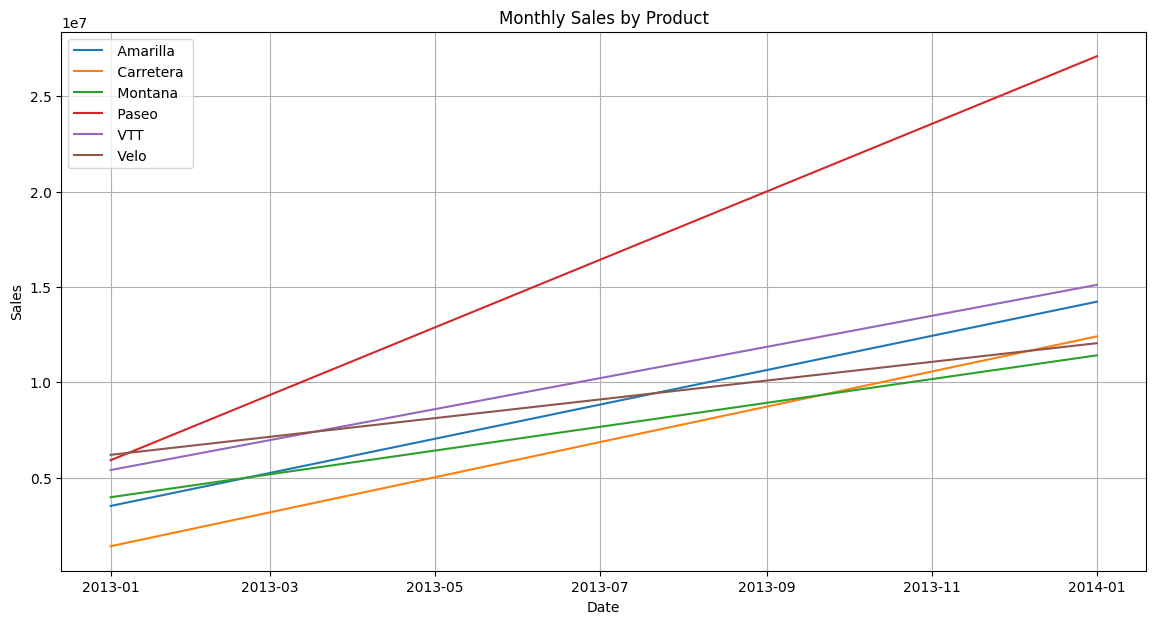

In [ ]:
# Create a new dataframe with total monthly sales for each product
monthly_product_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Sales': 'sum'})
monthly_product_sales.index.names = ['Year', 'Month', 'Product']
monthly_product_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_sales['Year-Month'] = pd.to_datetime(monthly_product_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_sales['Product'].unique():
    product_data = monthly_product_sales[monthly_product_sales['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Sales'], label=product)
plt.title('Monthly Sales by Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


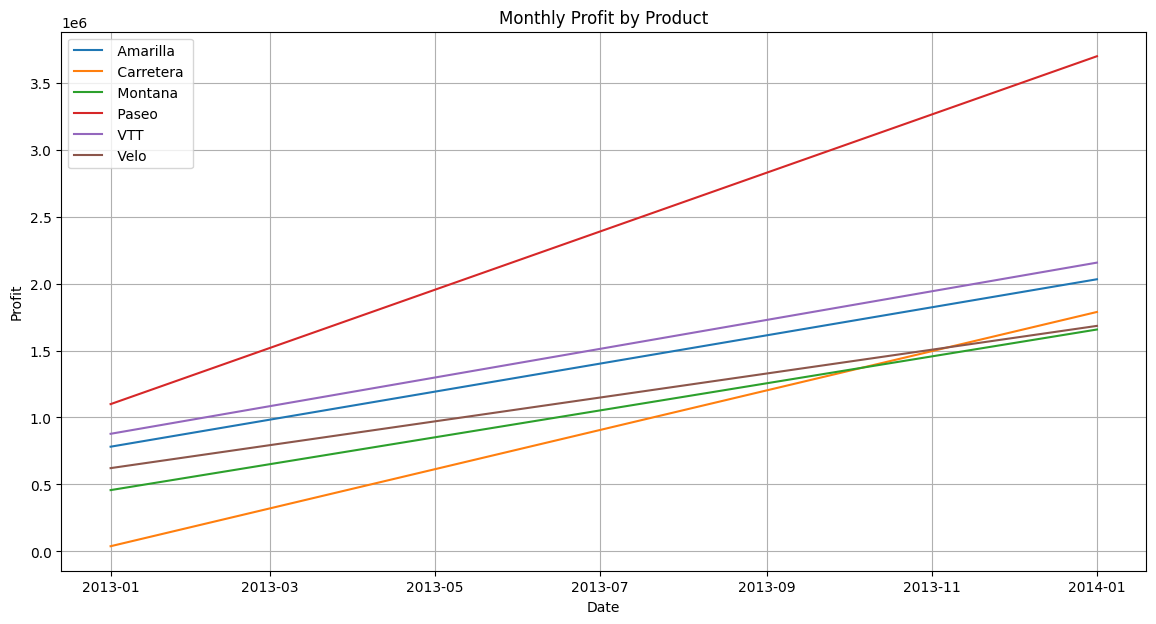

In [ ]:
# Create a new dataframe with total monthly profit for each product
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

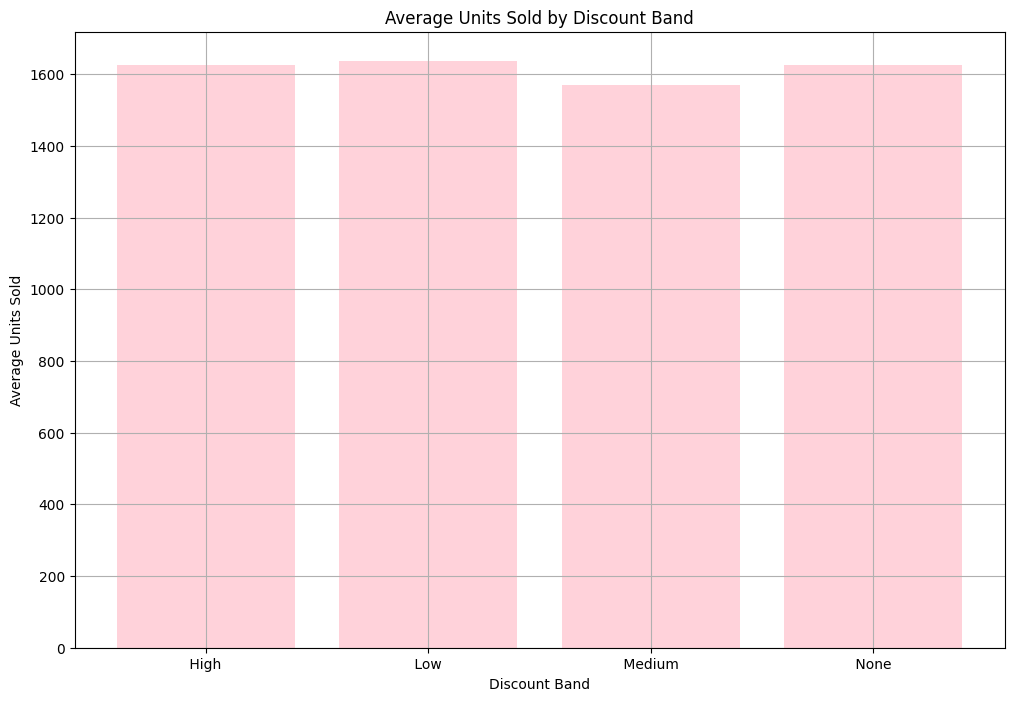

In [ ]:
# Calculate average 'Units Sold' for each 'Discount Band'
discount_band_units = df.groupby('Discount Band').agg({'Units Sold': 'mean'})

# Plot average 'Units Sold' by 'Discount Band'
plt.figure(figsize=(12, 8))
plt.bar(discount_band_units.index, discount_band_units['Units Sold'], color='pink', alpha=0.7)
plt.title('Average Units Sold by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Average Units Sold')
plt.grid()
plt.show()


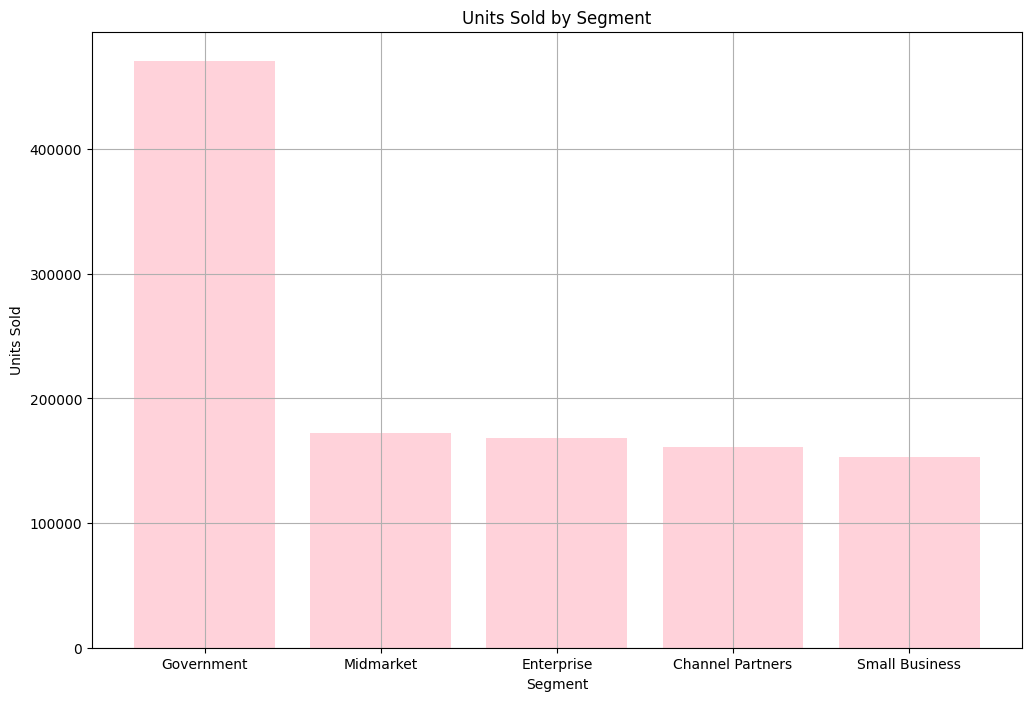

In [ ]:
# Calculate total 'Units Sold' for each 'Segment'
segment_units_sold = df.groupby('Segment').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
segment_units_sold = segment_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Segment
plt.figure(figsize=(12, 8))
plt.bar(segment_units_sold.index, segment_units_sold['Units Sold'], color='pink', alpha=0.7)
plt.title('Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

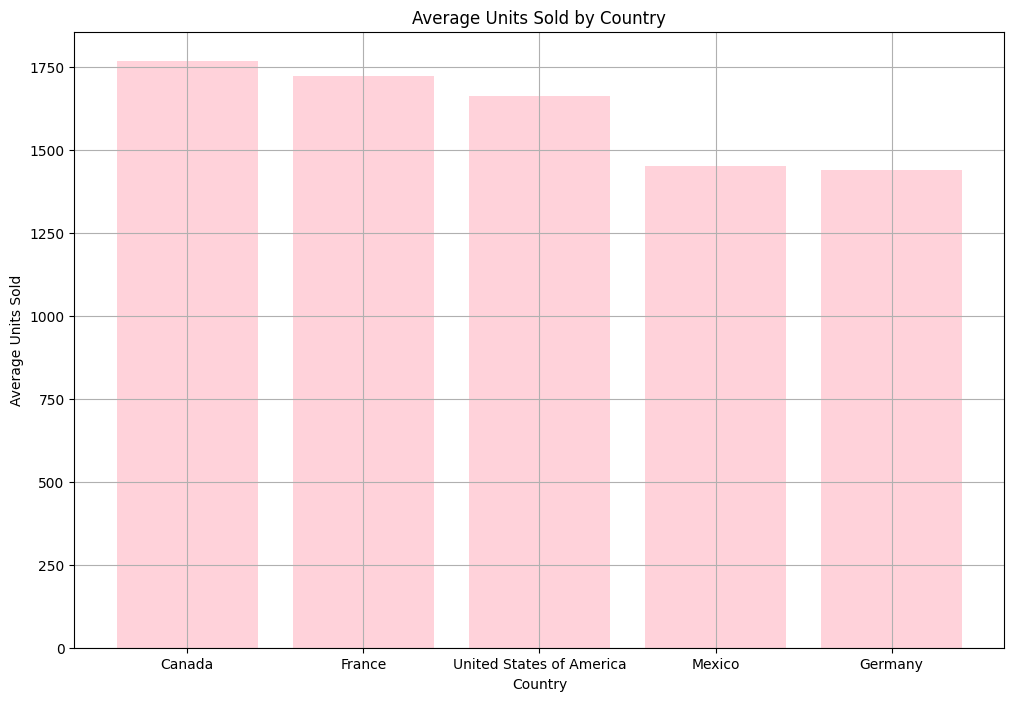

In [ ]:
# Calculate average 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'mean'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='pink', alpha=0.7)
plt.title('Average Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Average Units Sold')
plt.xticks()
plt.grid()
plt.show()

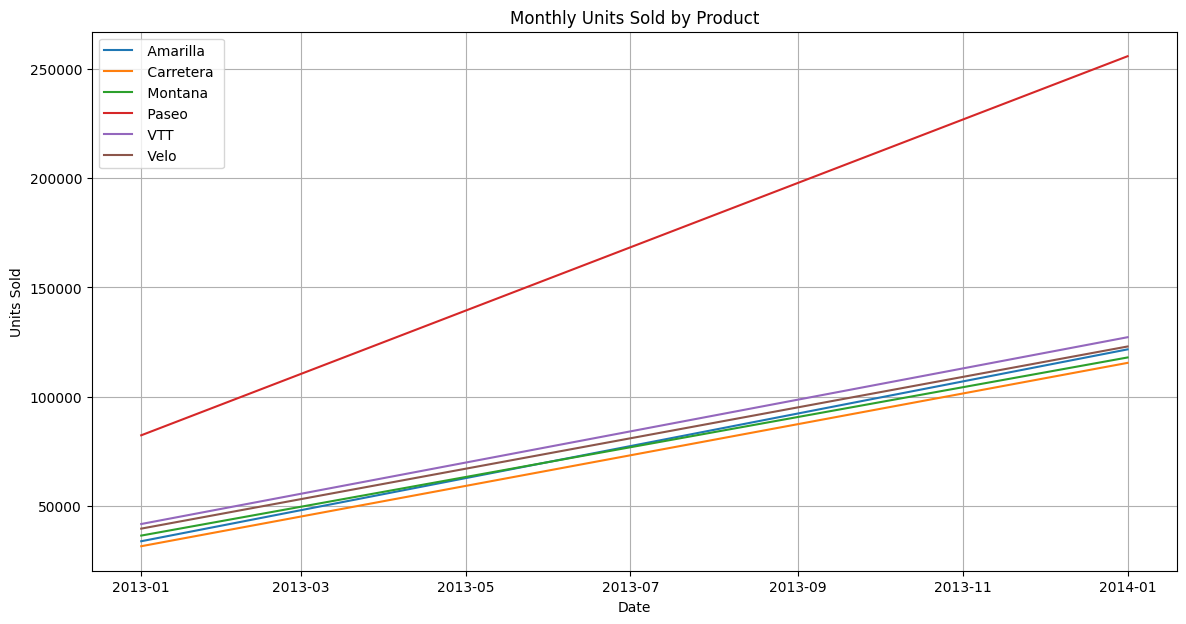

In [ ]:
# Create a new dataframe with total monthly units sold for each product
monthly_product_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Units Sold': 'sum'})
monthly_product_units.index.names = ['Year', 'Month', 'Product']
monthly_product_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_units['Year-Month'] = pd.to_datetime(monthly_product_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_units['Product'].unique():
    product_data = monthly_product_units[monthly_product_units['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Units Sold'], label=product)
plt.title('Monthly Units Sold by Product')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()


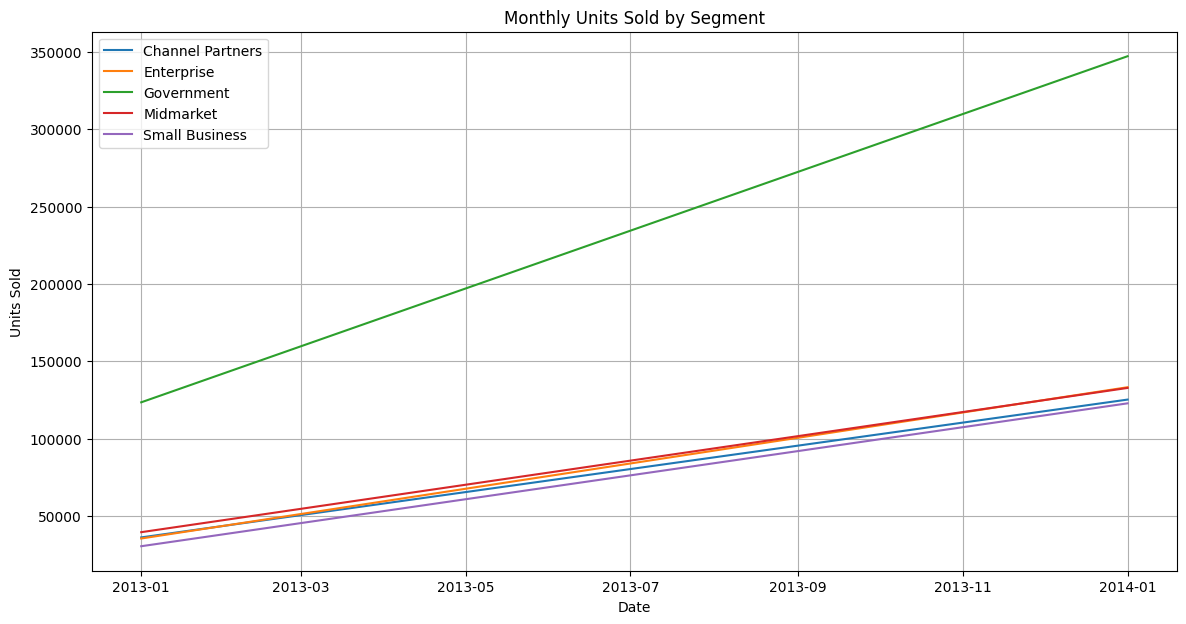

In [ ]:
# Create a new dataframe with total monthly units sold for each segment
monthly_segment_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Units Sold': 'sum'})
monthly_segment_units.index.names = ['Year', 'Month', 'Segment']
monthly_segment_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_units['Year-Month'] = pd.to_datetime(monthly_segment_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_units['Segment'].unique():
    segment_data = monthly_segment_units[monthly_segment_units['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Units Sold'], label=segment)
plt.title('Monthly Units Sold by Segment')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()

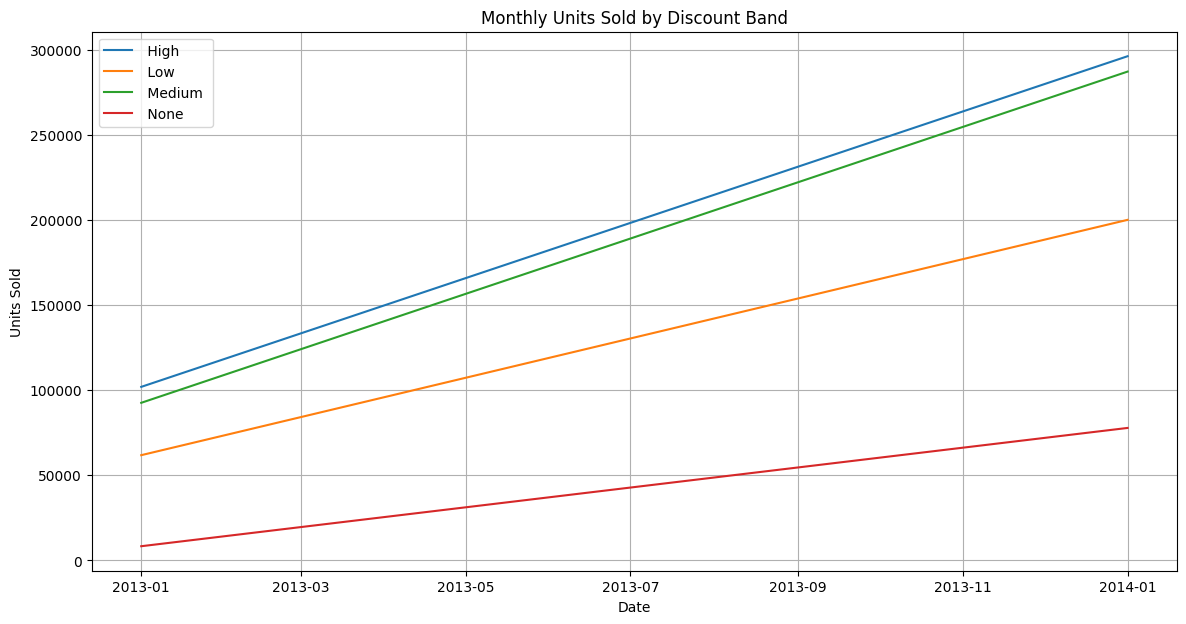

In [ ]:
# Create a new dataframe with total monthly units sold for each discount band
monthly_discount_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Discount Band']).agg({'Units Sold': 'sum'})
monthly_discount_units.index.names = ['Year', 'Month', 'Discount Band']
monthly_discount_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_discount_units['Year-Month'] = pd.to_datetime(monthly_discount_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each discount band
plt.figure(figsize=(14, 7))
for discount_band in monthly_discount_units['Discount Band'].unique():
    discount_band_data = monthly_discount_units[monthly_discount_units['Discount Band'] == discount_band]
    plt.plot(discount_band_data['Year-Month'], discount_band_data['Units Sold'], label=discount_band)
plt.title('Monthly Units Sold by Discount Band')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()

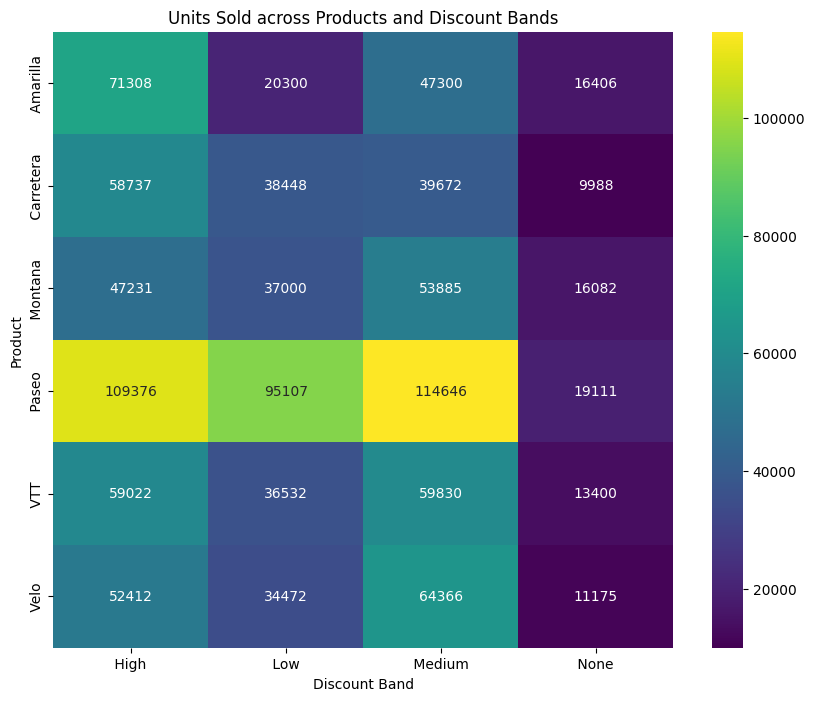

In [ ]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Discount Band' as dimensions
product_discount_units = df.pivot_table(values='Units Sold', index='Product', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_discount_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Discount Bands')
plt.show()

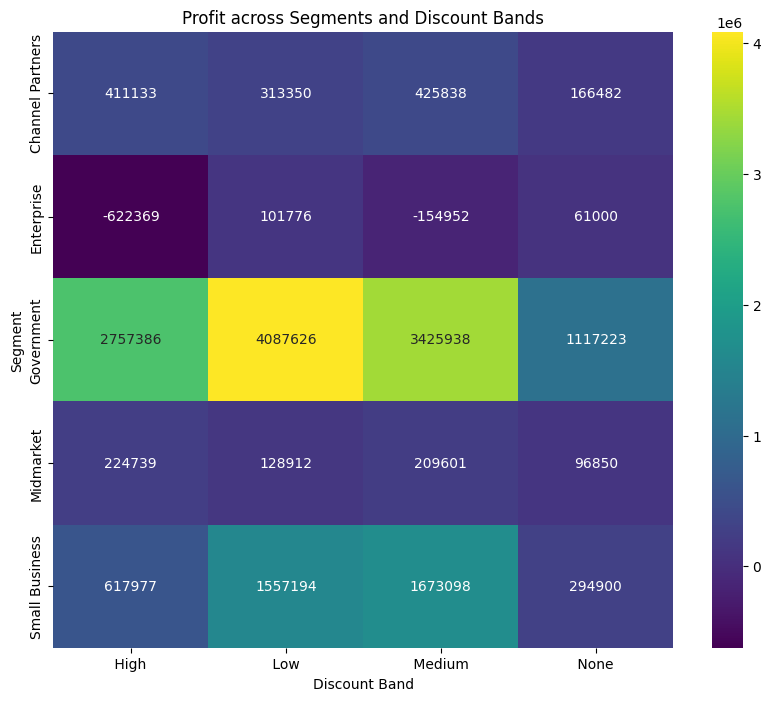

In [ ]:
# Create a pivot table of 'Profit' with 'Segment' and 'Discount Band' as dimensions
segment_discount_profit = df.pivot_table(values='Profit', index='Segment', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(segment_discount_profit, annot=True, fmt='.0f', cmap='viridis')
plt.title('Profit across Segments and Discount Bands')
plt.show()

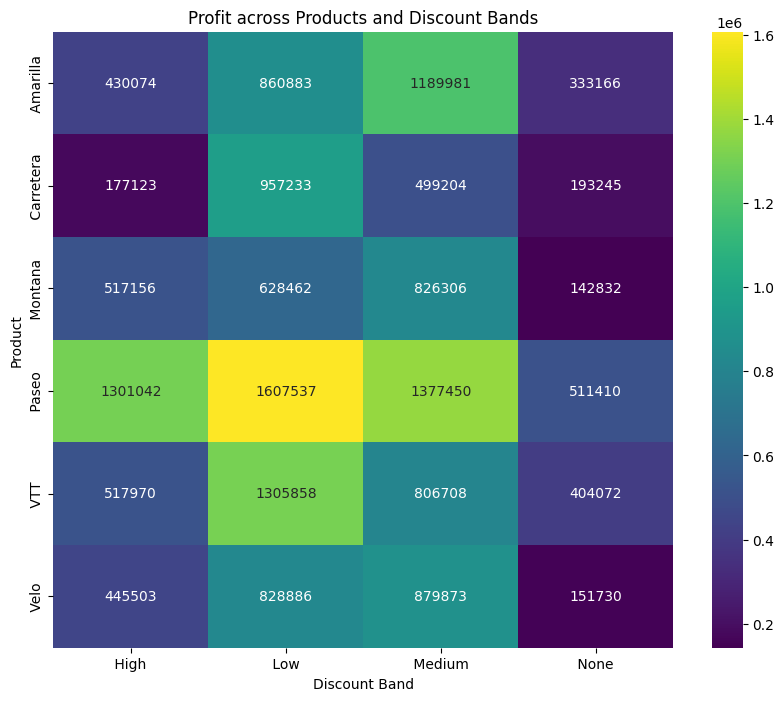

In [ ]:
# Create a pivot table of 'Profit' with 'Product' and 'Discount Band' as dimensions
product_discount_profit = df.pivot_table(values='Profit', index='Product', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_discount_profit, annot=True, fmt='.0f', cmap='viridis')
plt.title('Profit across Products and Discount Bands')
plt.show()

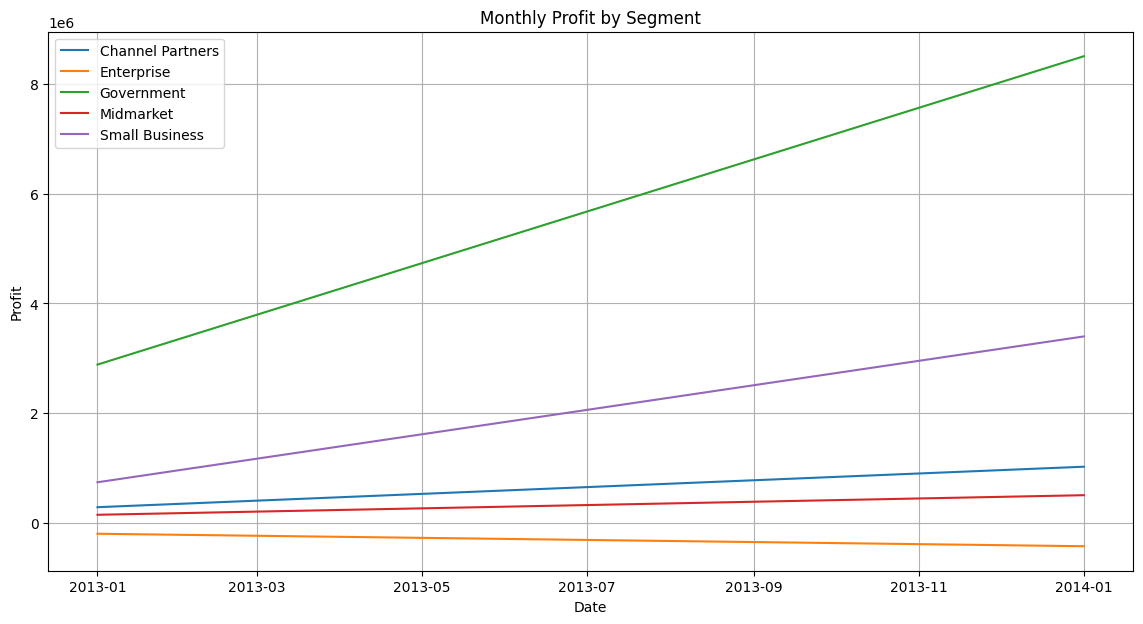

In [ ]:
# Create a new dataframe with total monthly profit for each segment
monthly_segment_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Profit': 'sum'})
monthly_segment_profit.index.names = ['Year', 'Month', 'Segment']
monthly_segment_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_profit['Year-Month'] = pd.to_datetime(monthly_segment_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_profit['Segment'].unique():
    segment_data = monthly_segment_profit[monthly_segment_profit['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Profit'], label=segment)
plt.title('Monthly Profit by Segment')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

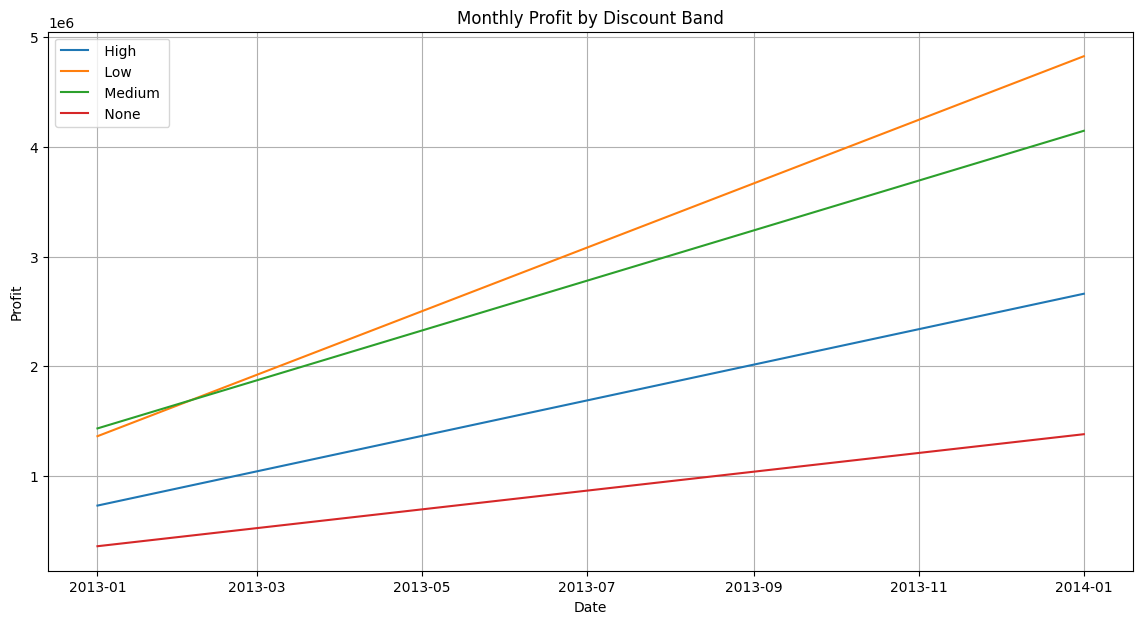

In [ ]:
# Create a new dataframe with total monthly profit for each discount band
monthly_discount_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Discount Band']).agg({'Profit': 'sum'})
monthly_discount_profit.index.names = ['Year', 'Month', 'Discount Band']
monthly_discount_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_discount_profit['Year-Month'] = pd.to_datetime(monthly_discount_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each discount band
plt.figure(figsize=(14, 7))
for discount_band in monthly_discount_profit['Discount Band'].unique():
    discount_band_data = monthly_discount_profit[monthly_discount_profit['Discount Band'] == discount_band]
    plt.plot(discount_band_data['Year-Month'], discount_band_data['Profit'], label=discount_band)
plt.title('Monthly Profit by Discount Band')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

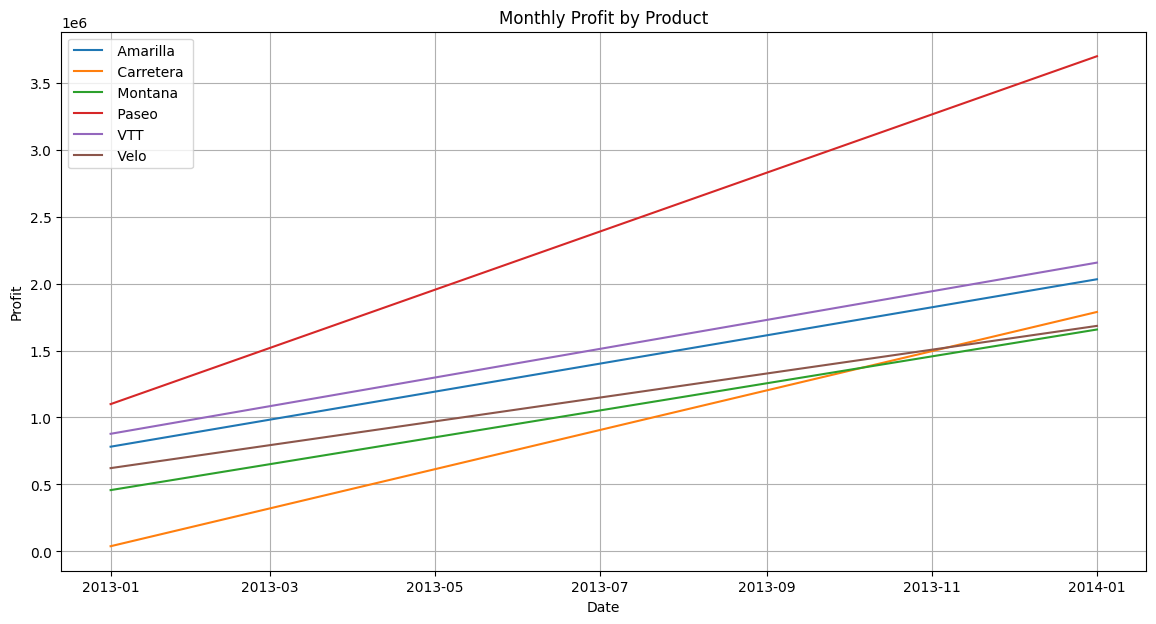

In [ ]:
# Create a new dataframe with total monthly profit for each product
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()


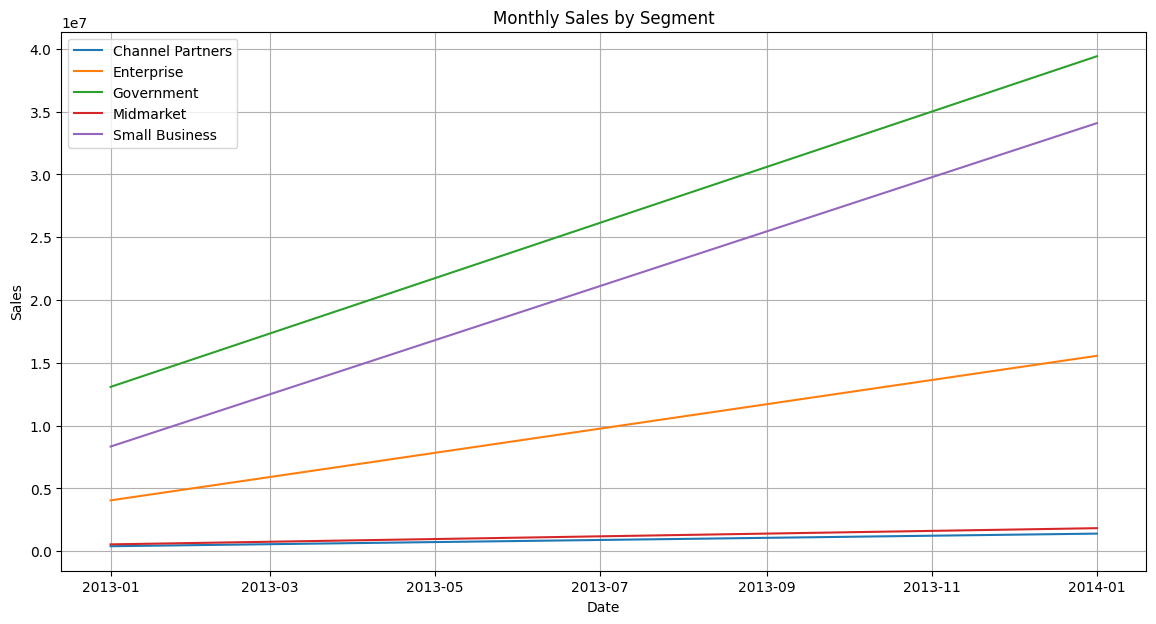

In [ ]:
# Create a new dataframe with total monthly sales for each segment
monthly_segment_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Sales': 'sum'})
monthly_segment_sales.index.names = ['Year', 'Month', 'Segment']
monthly_segment_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_sales['Year-Month'] = pd.to_datetime(monthly_segment_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_sales['Segment'].unique():
    segment_data = monthly_segment_sales[monthly_segment_sales['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Sales'], label=segment)
plt.title('Monthly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
